In [2]:
#This one is only upto part 3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn as sk
from datetime import datetime
from sklearn import metrics

In [3]:
df = pd.read_csv("./daily-min-temperatures.csv")

In [4]:
df.columns

Index(['Date', 'Temp'], dtype='object')

/home/sunil/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


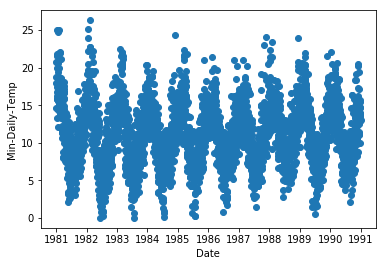

In [6]:
#part1

dateformat = [datetime.strptime(date_string, "%Y-%m-%d") for date_string in list(df['Date'])]
dates = matplotlib.dates.date2num(dateformat)
values = df['Temp']
#matplotlib.pyplot.plot_date(dates, values)

#plt.plot(dates, values)
plt.xlabel('Date')
plt.ylabel('Min-Daily-Temp')
plt.show()

In [8]:
date_string = df['Date'][0]
a = datetime.strptime(date_string, "%Y-%m-%d")
type(a)

datetime.datetime

In [9]:
df['Lagged'] = df['Temp'].shift(1)

In [10]:
df.head()

,Date,Temp,Lagged
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [11]:
df = df.drop([0], axis=0)
len(df['Temp'])

3649

In [12]:
df.head()

,Date,Temp,Lagged
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [13]:
corr = df.corr(method = 'pearson')
corr['Lagged']['Temp']

0.7748702165384445

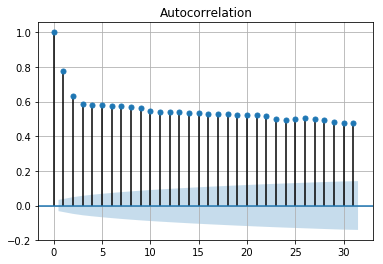

In [14]:
#part2
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df['Temp'], lags=31)
plt.grid()
plt.show()

In [15]:
#part3

def rmse(yActual, yPred):
    return np.sqrt(metrics.mean_squared_error(yActual, yPred))

In [16]:
train, test = df[:-7], df[-7:]
XTrain, yTrain = train['Temp'], train['Lagged']
XTest, yTest = test['Temp'], test['Lagged']

In [17]:
yPred = list()
for each in XTest:
    yPred.append(each)

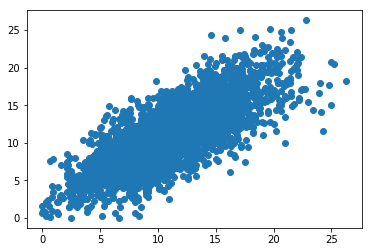

In [18]:
plt.scatter(yTrain, XTrain)

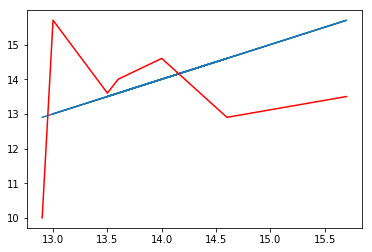

In [19]:
plt.plot(XTest, yPred)
#plt.scatter(XTest, yTest, color = 'r')

X_new = [float(x) for x, _ in sorted(zip(XTest, yTest))]
Y_new = [float(y) for _, y in sorted(zip(XTest, yTest))]
plt.plot(X_new, Y_new, color = 'r')
plt.show()

In [20]:
print("RMSE value for persistence model is: ", rmse(yTest, yPred))

RMSE value for persistence model is:  1.8500965225785224
